# **Question 1**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import random
import math

image = Image.open("barbara_gray.bmp")
image = image.convert('L')
image_array = np.array(image)

In [ ]:
def median_filter(image, kernel_size):
    padd = kernel_size // 2
    padded_image = padding(image, padd, padd)
    height, width = padded_image.shape
    filtered_image = np.zeros((height - 2*padd, width - 2*padd), dtype=np.uint8)
    for i in range(padd, height - padd):
        for j in range(padd, width - padd):
            neighborhood = image[i - padd:i + padd + 1, j - padd:j + padd + 1]
            median_value = np.median(neighborhood)
            filtered_image[i - padd, j - padd] = median_value
    return filtered_image

def padding(image, pad_height, pad_width):
    padded_image = np.zeros((image.shape[0] + 2 * pad_height, image.shape[1] + 2 * pad_width))
    padded_image[pad_height:pad_height + image.shape[0], pad_width:pad_width + image.shape[1]] = image
    return padded_image

In [ ]:
def salt_and_pepper_noise(image, noise_level):
    noisy_image = np.copy(image)
    height, width = noisy_image.shape
    num_pixels = int(noise_level * height * width)

    salt_pixels_x = [random.randint(0, height - 1) for i in range(num_pixels)]
    salt_pixels_y = [random.randint(0, width - 1) for i in range(num_pixels)]
    noisy_image[salt_pixels_y, salt_pixels_x] = 0

    pepper_pixels_x = [random.randint(0, height - 1) for j in range(num_pixels)]
    pepper_pixels_y = [random.randint(0, width - 1) for j in range(num_pixels)]
    noisy_image[pepper_pixels_y, pepper_pixels_x] = 255

    return noisy_image

noisy_image_5 = salt_and_pepper_noise(image_array, 0.05)
noisy_image_15 = salt_and_pepper_noise(image_array, 0.15)
noisy_image_20 = salt_and_pepper_noise(image_array, 0.20)
noisy_image_25 = salt_and_pepper_noise(image_array, 0.25)

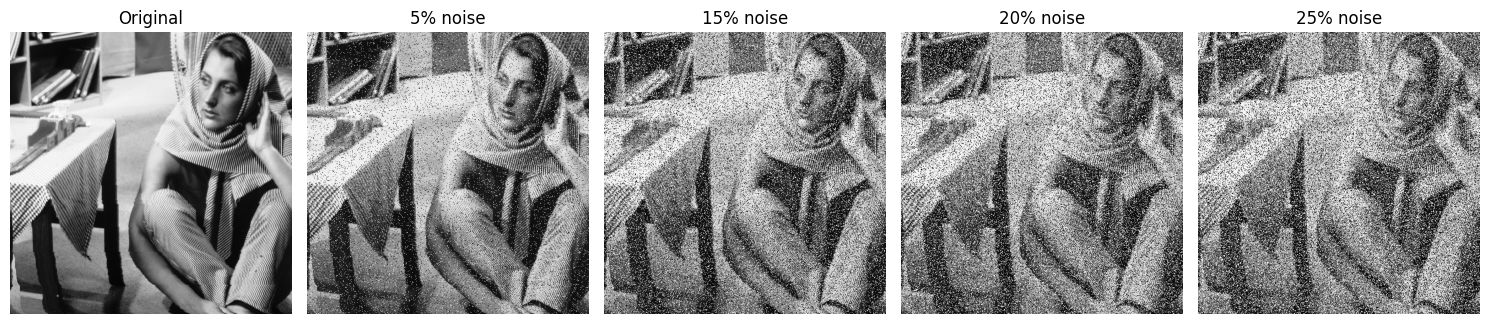

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].imshow(image_array, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(noisy_image_5, cmap='gray')
axs[1].set_title("5% noise")
axs[1].axis('off')

axs[2].imshow(noisy_image_15, cmap='gray')
axs[2].set_title("15% noise")
axs[2].axis('off')

axs[3].imshow(noisy_image_20, cmap='gray')
axs[3].set_title("20% noise")
axs[3].axis('off')

axs[4].imshow(noisy_image_25, cmap='gray')
axs[4].set_title("25% noise")
axs[4].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def calculate_psnr(clean_image, denoised_image):
    clean_image = clean_image.astype(np.float32)
    denoised_image = denoised_image.astype(np.float32)

    mse = np.mean((clean_image - denoised_image) ** 2)
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

def find_best_window_size(noisy_image, clean_image, max_window_size=9):
    best_psnr = 0
    best_window_size = 1
    best_denoised_image = None
    for window_size in range(3, max_window_size + 1, 2):
        denoised_image = median_filter(noisy_image, window_size)
        psnr = calculate_psnr(clean_image, denoised_image)
        if psnr > best_psnr:
            best_psnr = psnr
            best_window_size = window_size
            best_denoised_image = denoised_image
    return best_window_size, best_psnr, best_denoised_image

best_window_size_5, best_psnr_5, denoised_image_5 = find_best_window_size(noisy_image_5, image_array)
best_window_size_15, best_psnr_15, denoised_image_15 = find_best_window_size(noisy_image_15, image_array)
best_window_size_20, best_psnr_20, denoised_image_20 = find_best_window_size(noisy_image_20, image_array)
best_window_size_25, best_psnr_25, denoised_image_25 = find_best_window_size(noisy_image_25, image_array)

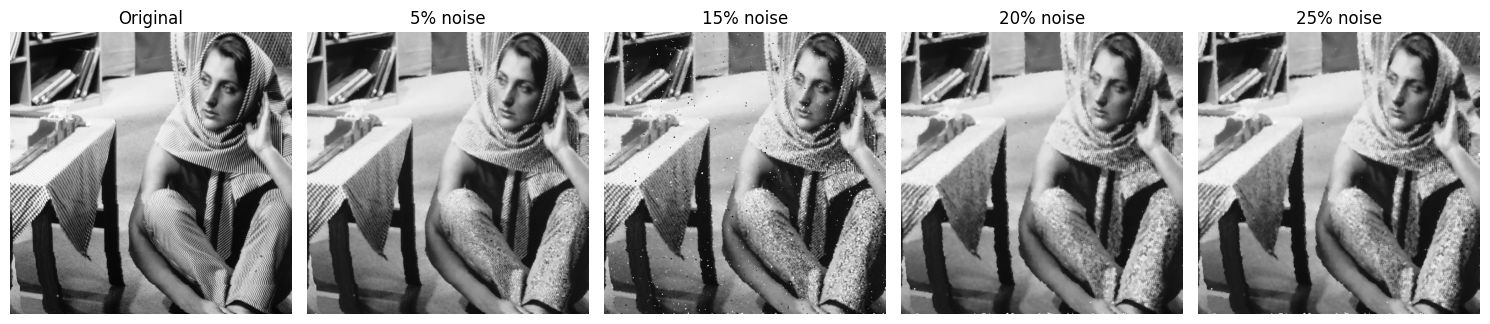

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].imshow(image_array, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(denoised_image_5, cmap='gray')
axs[1].set_title("5% noise")
axs[1].axis('off')

axs[2].imshow(denoised_image_15, cmap='gray')
axs[2].set_title("15% noise")
axs[2].axis('off')

axs[3].imshow(denoised_image_20, cmap='gray')
axs[3].set_title("20% noise")
axs[3].axis('off')

axs[4].imshow(denoised_image_20, cmap='gray')
axs[4].set_title("25% noise")
axs[4].axis('off')

plt.tight_layout()
plt.show()

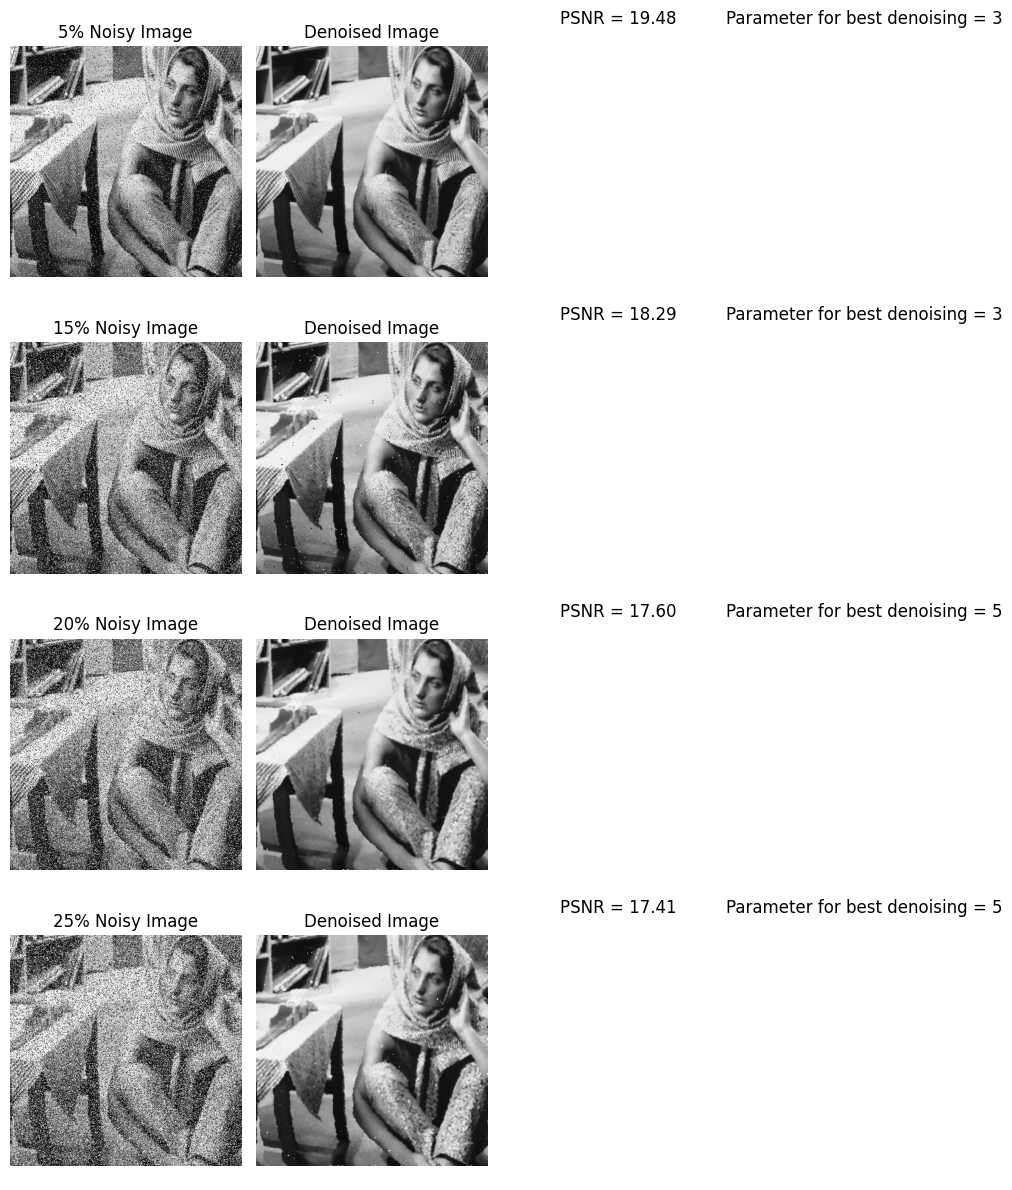

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(10, 12))

axs[0, 0].set_title("5% Noisy Image")
axs[0, 0].imshow(noisy_image_5, cmap='gray')
axs[0, 0].axis('off')

axs[0, 1].set_title("Denoised Image")
axs[0, 1].imshow(denoised_image_5, cmap='gray')
axs[0, 1].axis('off')

axs[0, 2].set_title(f"PSNR = {best_psnr_5:.2f}")
axs[0, 2].axis('off')

axs[0, 3].set_title(f"Parameter for best denoising = {best_window_size_5}")
axs[0, 3].axis('off')

axs[1, 0].set_title("15% Noisy Image")
axs[1, 0].imshow(noisy_image_15, cmap='gray')
axs[1, 0].axis('off')

axs[1, 1].set_title("Denoised Image")
axs[1, 1].imshow(denoised_image_15, cmap='gray')
axs[1, 1].axis('off')

axs[1, 2].set_title(f"PSNR = {best_psnr_15:.2f}")
axs[1, 2].axis('off')

axs[1, 3].set_title(f"Parameter for best denoising = {best_window_size_15}")
axs[1, 3].axis('off')

axs[2, 0].set_title("20% Noisy Image")
axs[2, 0].imshow(noisy_image_20, cmap='gray')
axs[2, 0].axis('off')

axs[2, 1].set_title("Denoised Image")
axs[2, 1].imshow(denoised_image_20, cmap='gray')
axs[2, 1].axis('off')

axs[2, 2].set_title(f"PSNR = {best_psnr_20:.2f}")
axs[2, 2].axis('off')

axs[2, 3].set_title(f"Parameter for best denoising = {best_window_size_20}")
axs[2, 3].axis('off')

axs[3, 0].set_title("25% Noisy Image")
axs[3, 0].imshow(noisy_image_25, cmap='gray')
axs[3, 0].axis('off')

axs[3, 1].set_title("Denoised Image")
axs[3, 1].imshow(denoised_image_25, cmap='gray')
axs[3, 1].axis('off')

axs[3, 2].set_title(f"PSNR = {best_psnr_25:.2f}")
axs[3, 2].axis('off')

axs[3, 3].set_title(f"Parameter for best denoising = {best_window_size_25}")
axs[3, 3].axis('off')

plt.tight_layout()
plt.show()

# **Question 2**

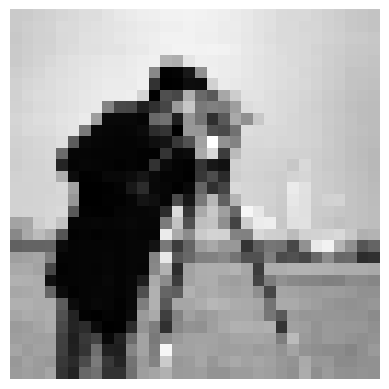

In [ ]:
from PIL import Image
input_image = Image.open("cameraman.png")
input_image = input_image.convert('L')

left, upper, right, lower = 0, 0, 512, 512
input_image = input_image.crop((left, upper, right, lower))

original_width, original_height = input_image.size
new_width = original_width // 16
new_height = original_height // 16
output_image = Image.new(input_image.mode, (new_width, new_height))

for x in range(new_width):
    for y in range(new_height):
        pixel_values = []
        for i in range(16):
            for j in range(16):
                pixel_value = input_image.getpixel((x * 16 + i, y * 16 + j))
                pixel_values.append(pixel_value)
        average_value = int(sum(pixel_values) / len(pixel_values))
        output_image.putpixel((x, y), average_value)

output_image.save("resized_cameraman.png")

plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

Nearest Neighbour interpolation

PSNR : 19.454799310984264
Super-Resolved Image Size: 512x512


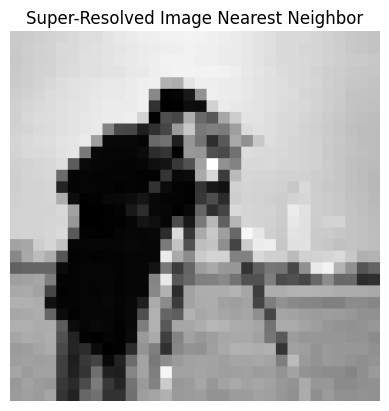

In [ ]:
import numpy as np
from PIL import Image

resized_image = Image.open('resized_cameraman.png')
resized_image = resized_image.convert('L')
resized_width, resized_height = resized_image.size

target_width = 512
target_height = 512

super_resolved_image = np.zeros((target_height, target_width), dtype=np.uint8)

x_scale = target_width / resized_width
y_scale = target_height / resized_height

for y in range(target_height):
    for x in range(target_width):
        orig_x = int(x / x_scale)
        orig_y = int(y / y_scale)
        pixel = resized_image.getpixel((orig_x, orig_y))
        super_resolved_image[y, x] = pixel

super_resolved_image_nn = Image.fromarray(super_resolved_image, mode='L')

super_resolved_width_nn, super_resolved_height_nn = super_resolved_image_nn.size
psnr_nn = calculate_psnr(np.array(input_image), np.array(super_resolved_image_nn))
print(f"PSNR : {psnr_nn}")
print(f"Super-Resolved Image Size: {super_resolved_width_nn}x{super_resolved_height_nn}")

super_resolved_image_nn.save('super_resolved_nn.png')

plt.imshow(super_resolved_image_nn, cmap='gray')
plt.title('Super-Resolved Image Nearest Neighbor')
plt.axis('off')
plt.show()

PSNR : 14.36737339799902
Super-Resolved Image Size: 512x512


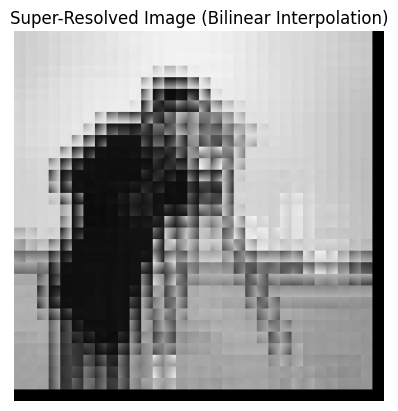

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def kernel(x):
    if abs(x) < 1:
        return 1 - abs(x)
    else:
        return 0

resized_image = Image.open('resized_cameraman.png')
resized_image = resized_image.convert('L')
resized_width, resized_height = resized_image.size

target_width = 512
target_height = 512

super_resolved_image = np.zeros((target_height, target_width), dtype=np.uint8)

x_scale = target_width / resized_width
y_scale = target_height / resized_height

for y in range(target_height):
    for x in range(target_width):
        orig_x = x / x_scale
        orig_y = y / y_scale
        x1 = int(orig_x)
        x2 = x1 + 1
        y1 = int(orig_y)
        y2 = y1 + 1
        dx = orig_x - x1
        dy = orig_y - y1

        if 0 <= x1 < resized_width - 1 and 0 <= y1 < resized_height - 1:
            interpolated_pixel = (kernel(1 - dx) * kernel(1 - dy) * resized_image.getpixel((x1, y1)) + kernel(dx) * kernel(1 - dy) * resized_image.getpixel((x2, y1))
                                     + kernel(1 - dx) * kernel(dy) * resized_image.getpixel((x1, y2)) + kernel(dx) * kernel(dy) * resized_image.getpixel((x2, y2)))
            super_resolved_image[y, x] = int(interpolated_pixel)

super_resolved_image_bilinear = Image.fromarray(super_resolved_image, mode='L')

super_resolved_width_bilinear, super_resolved_height_bilinear = super_resolved_image_bilinear.size
psnr_bilinear = calculate_psnr(np.array(input_image), np.array(super_resolved_image_bilinear))
print(f"PSNR : {psnr_bilinear}")
print(f"Super-Resolved Image Size: {super_resolved_width_bilinear}x{super_resolved_height_bilinear}")

super_resolved_image_bilinear.save('super_resolved_bilinear.png')

plt.imshow(super_resolved_image_bilinear, cmap='gray')
plt.title('Super-Resolved Image (Bilinear Interpolation)')
plt.axis('off')
plt.show()

PSNR : 16.35271507823567
Super-Resolved Image Size: 512x512


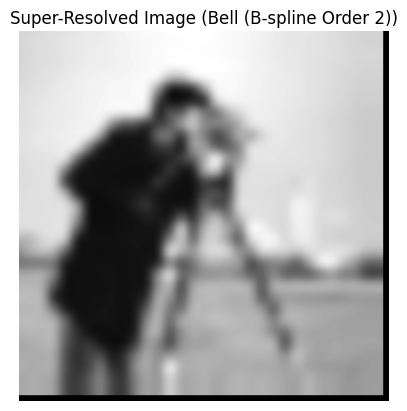

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def kernel(x):
    if abs(x) < 0.5:
        return 0.75 - x**2
    elif 0.5 <= abs(x) < 1.5:
        return 0.5 * (abs(x) - 1.5)**2
    else:
        return 0

resized_image = Image.open('resized_cameraman.png')
resized_image = resized_image.convert('L')
resized_width, resized_height = resized_image.size

target_width = 512
target_height = 512

super_resolved_image = np.zeros((target_height, target_width), dtype=np.uint8)

x_scale = target_width / resized_width
y_scale = target_height / resized_height

for y in range(target_height):
    for x in range(target_width):
        orig_x = x / x_scale
        orig_y = y / y_scale

        super_resolved_value = 0
        weight_sum = 0

        for j in range(-1, 3):
            for i in range(-1, 3):
                x_idx = int(orig_x) + i
                y_idx = int(orig_y) + j

                if 0 <= x_idx < resized_width - 1 and 0 <= y_idx < resized_height - 1:
                    dx = orig_x - x_idx
                    dy = orig_y - y_idx
                    kernel_value = kernel(dx) * kernel(dy)
                    pixel_value = resized_image.getpixel((x_idx, y_idx))
                    super_resolved_value += kernel_value * pixel_value
                    weight_sum += kernel_value

        if weight_sum > 0:
            interpolated_pixel = super_resolved_value / weight_sum
            super_resolved_image[y, x] = int(interpolated_pixel)

super_resolved_image_bell = Image.fromarray(super_resolved_image, mode='L')

super_resolved_width_bell, super_resolved_height_bell = super_resolved_image_bell.size
psnr_bell = calculate_psnr(np.array(input_image), np.array(super_resolved_image_bell))
print(f"PSNR : {psnr_bell}")
print(f"Super-Resolved Image Size: {super_resolved_width_bell}x{super_resolved_height_bell}")

super_resolved_image_bell.save('super_resolved_bell.png')

plt.imshow(super_resolved_image_bell, cmap='gray')
plt.title('Super-Resolved Image (Bell (B-spline Order 2))')
plt.axis('off')

plt.show()

PSNR : 15.097035587064642
Super-Resolved Image Size: 512x512


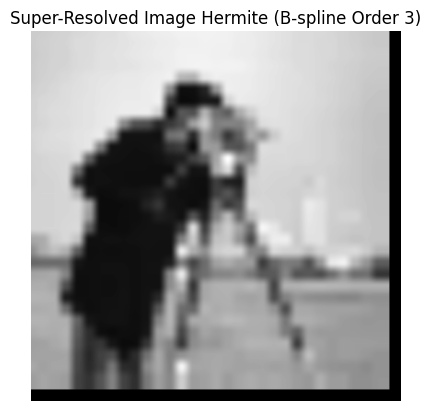

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def kernel(x):
    if abs(x) <= 1:
        return (2 * abs(x) ** 3 - 3 * abs(x) ** 2 + 1)
    else:
        return 0

resized_image = Image.open('resized_cameraman.png')
resized_image = resized_image.convert('L')
resized_width, resized_height = resized_image.size

target_width = 512
target_height = 512

super_resolved_image = np.zeros((target_height, target_width), dtype=np.uint8)

x_scale = target_width / resized_width
y_scale = target_height / resized_height

for y in range(target_height):
    for x in range(target_width):
        orig_x = x / x_scale
        orig_y = y / y_scale

        super_resolved_value = 0
        weight_sum = 0

        for j in range(-1, 3):
            for i in range(-1, 3):
                x_idx = int(orig_x) + i
                y_idx = int(orig_y) + j

                if 0 <= x_idx < resized_width - 1 and 0 <= y_idx < resized_height - 1:
                    dx = orig_x - x_idx
                    dy = orig_y - y_idx
                    kernel_value = kernel(dx) * kernel(dy)
                    pixel_value = resized_image.getpixel((x_idx, y_idx))
                    super_resolved_value += kernel_value * pixel_value
                    weight_sum += kernel_value

        if weight_sum > 0:
            interpolated_pixel = super_resolved_value / weight_sum
            super_resolved_image[y, x] = int(interpolated_pixel)

super_resolved_image_hermite = Image.fromarray(super_resolved_image, mode='L')

super_resolved_width_hermite, super_resolved_height_hermite = super_resolved_image_hermite.size
psnr_hermite = calculate_psnr(np.array(input_image), np.array(super_resolved_image_hermite))
print(f"PSNR : {psnr_hermite}")
print(f"Super-Resolved Image Size: {super_resolved_width_hermite}x{super_resolved_height_hermite}")

super_resolved_image_hermite.save('super_resolved_hermite.png')

plt.imshow(super_resolved_image_hermite, cmap='gray')
plt.title('Super-Resolved Image Hermite (B-spline Order 3)')
plt.axis('off')

plt.show()

PSNR : 15.058621721399561
Super-Resolved Image Size: 512x512


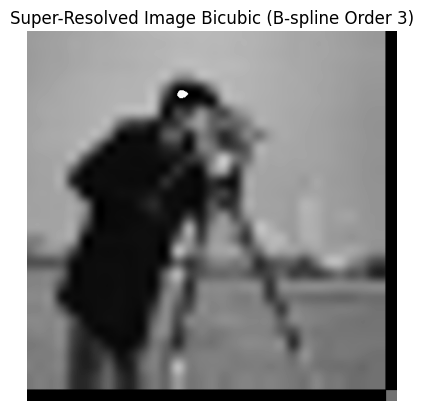

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def bicubic_kernel(x, a=-0.5):
    if abs(x) <= 1:
        return (a + 2) * abs(x)**3 - (a + 3) * abs(x)**2 + 1
    elif 1 <= abs(x) < 2:
        return a * abs(x)**3 - 5 * a * abs(x)**2 + 8 * a * abs(x) - 4 * a
    else:
        return 0

resized_image = Image.open('resized_cameraman.png')
resized_image = resized_image.convert('L')
resized_width, resized_height = resized_image.size

target_width = 512
target_height = 512

super_resolved_image = np.zeros((target_height, target_width), dtype=np.uint8)

x_scale = target_width / resized_width
y_scale = target_height / resized_height

for y in range(target_height):
    for x in range(target_width):
        orig_x = x / x_scale
        orig_y = y / y_scale

        super_resolved_value = 0
        weight_sum = 0

        for j in range(-1, 3):
            for i in range(-1, 3):
                x_idx = int(orig_x) + i
                y_idx = int(orig_y) + j

                if 0 <= x_idx < resized_width - 1 and 0 <= y_idx < resized_height - 1:
                    dx = orig_x - x_idx
                    dy = orig_y - y_idx

                    kernel_value = bicubic_kernel(dx) * bicubic_kernel(dy)
                    pixel_value = resized_image.getpixel((x_idx, y_idx))
                    super_resolved_value += kernel_value * pixel_value
                    weight_sum += kernel_value

        if weight_sum > 0:
            interpolated_pixel = super_resolved_value / weight_sum
            super_resolved_image[y, x] = int(interpolated_pixel)

super_resolved_image_bicubic = Image.fromarray(super_resolved_image, mode='L')

super_resolved_width_bicubic, super_resolved_height_bicubic = super_resolved_image_bicubic.size
psnr_bicubic = calculate_psnr(np.array(input_image), np.array(super_resolved_image_bicubic))
print(f"PSNR : {psnr_bicubic}")
print(f"Super-Resolved Image Size: {super_resolved_width_bicubic}x{super_resolved_height_bicubic}")

super_resolved_image_bicubic.save('super_resolved_bicubic.png')

plt.imshow(super_resolved_image_bicubic, cmap='gray')
plt.title('Super-Resolved Image Bicubic (B-spline Order 3)')
plt.axis('off')

plt.show()

PSNR : 14.626844657517813
Super-Resolved Image Size: 512x512


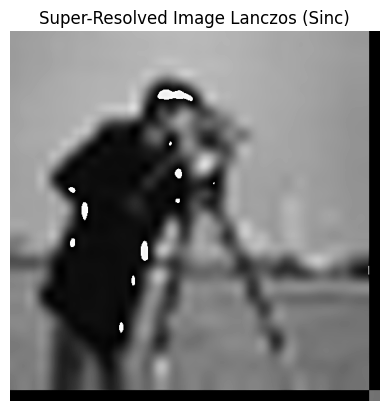

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def sinc(x):
    if x == 0:
        return 1.0
    else:
        return np.sin(np.pi * x) / (np.pi * x)

def lanczos_kernel(x, a=3):
    if abs(x) < a:
        return sinc(x) * sinc(x / a)
    else:
        return 0

resized_image = Image.open('resized_cameraman.png')
resized_image = resized_image.convert('L')
resized_width, resized_height = resized_image.size

target_width = 512
target_height = 512

super_resolved_image = np.zeros((target_height, target_width), dtype=np.uint8)

x_scale = target_width / resized_width
y_scale = target_height / resized_height

a = 3
for y in range(target_height):
    for x in range(target_width):
        orig_x = x / x_scale
        orig_y = y / y_scale

        super_resolved_value = 0
        weight_sum = 0

        for j in range(-a + 1, a):
            for i in range(-a + 1, a):
                x_idx = int(orig_x) + i
                y_idx = int(orig_y) + j

                if 0 <= x_idx < resized_width - 1 and 0 <= y_idx < resized_height - 1:
                    dx = orig_x - x_idx
                    dy = orig_y - y_idx
                    kernel_value = lanczos_kernel(dx) * lanczos_kernel(dy)
                    pixel_value = resized_image.getpixel((x_idx, y_idx))
                    super_resolved_value += kernel_value * pixel_value
                    weight_sum += kernel_value

        if weight_sum > 0:
            interpolated_pixel = super_resolved_value / weight_sum
            super_resolved_image[y, x] = int(interpolated_pixel)

super_resolved_image_lanczos = Image.fromarray(super_resolved_image, mode='L')

super_resolved_width_lanczos, super_resolved_height_lanczos = super_resolved_image_lanczos.size
psnr_lanczos = calculate_psnr(np.array(input_image), np.array(super_resolved_image_lanczos))
print(f"PSNR : {psnr_lanczos}")
print(f"Super-Resolved Image Size: {super_resolved_width_lanczos}x{super_resolved_height_lanczos}")

super_resolved_image_lanczos.save('super_resolved_lanczos.png')

plt.imshow(super_resolved_image_lanczos, cmap='gray')
plt.title('Super-Resolved Image Lanczos (Sinc)')
plt.axis('off')

plt.show()

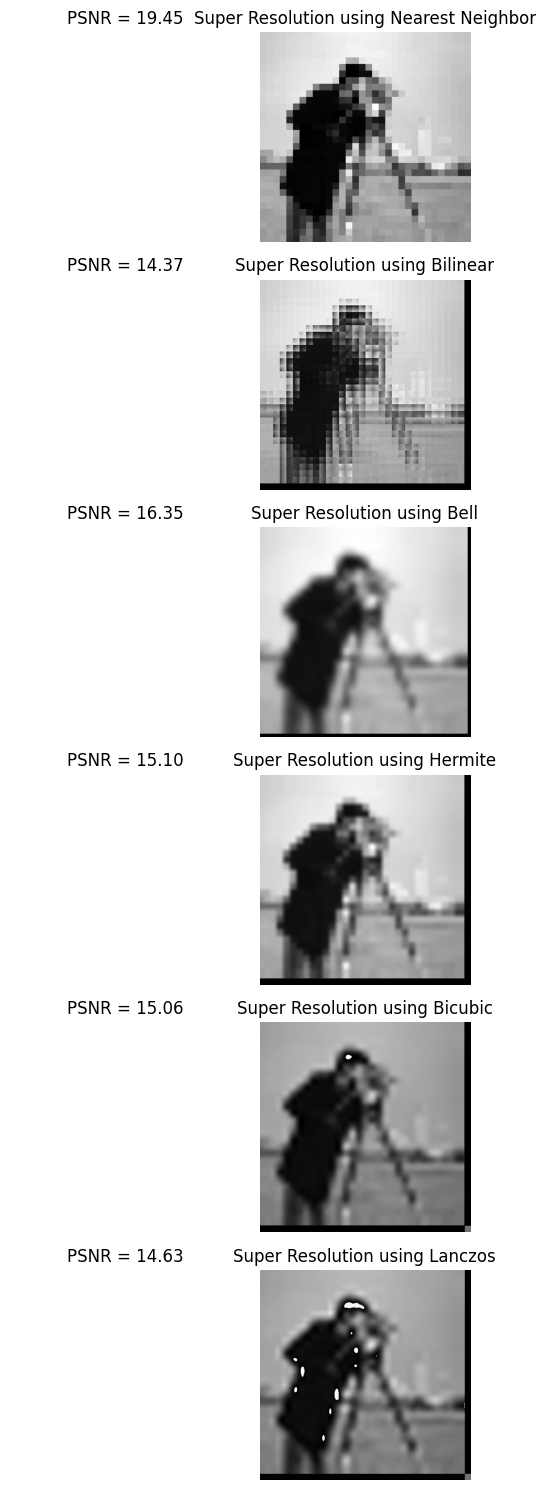

In [ ]:
fig, axs = plt.subplots(6, 2, figsize=(5, 15))

axs[0, 0].set_title(f"PSNR = {psnr_nn:.2f}")
axs[0, 0].axis('off')

axs[0, 1].set_title("Super Resolution using Nearest Neighbor")
axs[0, 1].imshow(super_resolved_image_nn, cmap='gray')
axs[0, 1].axis('off')

axs[1, 0].set_title(f"PSNR = {psnr_bilinear:.2f}")
axs[1, 0].axis('off')

axs[1, 1].set_title("Super Resolution using Bilinear")
axs[1, 1].imshow(super_resolved_image_bilinear, cmap='gray')
axs[1, 1].axis('off')

axs[2, 0].set_title(f"PSNR = {psnr_bell:.2f}")
axs[2, 0].axis('off')

axs[2, 1].set_title("Super Resolution using Bell")
axs[2, 1].imshow(super_resolved_image_bell, cmap='gray')
axs[2, 1].axis('off')

axs[3, 0].set_title(f"PSNR = {psnr_hermite:.2f}")
axs[3, 0].axis('off')

axs[3, 1].set_title("Super Resolution using Hermite")
axs[3, 1].imshow(super_resolved_image_hermite, cmap='gray')
axs[3, 1].axis('off')

axs[4, 0].set_title(f"PSNR = {psnr_bicubic:.2f}")
axs[4, 0].axis('off')

axs[4, 1].set_title("Super Resolution using Bicubic")
axs[4, 1].imshow(super_resolved_image_bicubic, cmap='gray')
axs[4, 1].axis('off')

axs[5, 0].set_title(f"PSNR = {psnr_lanczos:.2f}")
axs[5, 0].axis('off')

axs[5, 1].set_title("Super Resolution using Lanczos")
axs[5, 1].imshow(super_resolved_image_lanczos, cmap='gray')
axs[5, 1].axis('off')

plt.tight_layout()
plt.show()